Lons:  [165.40406799 165.39234924 165.38061523 ... 161.38577271 162.08840942
 163.06361389]
lat:  [ 5.31830549  5.33971596  5.36112404 ... 64.37602997 64.41822815
 64.47119904]
Altitud:  [ 47.62874222  50.01202393  52.39191437 ... 769.17883301 770.22131348
 771.31011963]
Densidad:  [-18745.0703125  -19099.25       -19496.29101562 ...  10358.48339844
  10833.10058594  10727.10058594]
Total Electronic Content:  [83.06749725 83.65894318 84.26953888 ...  0.44447848  0.36774701
  0.25166655]


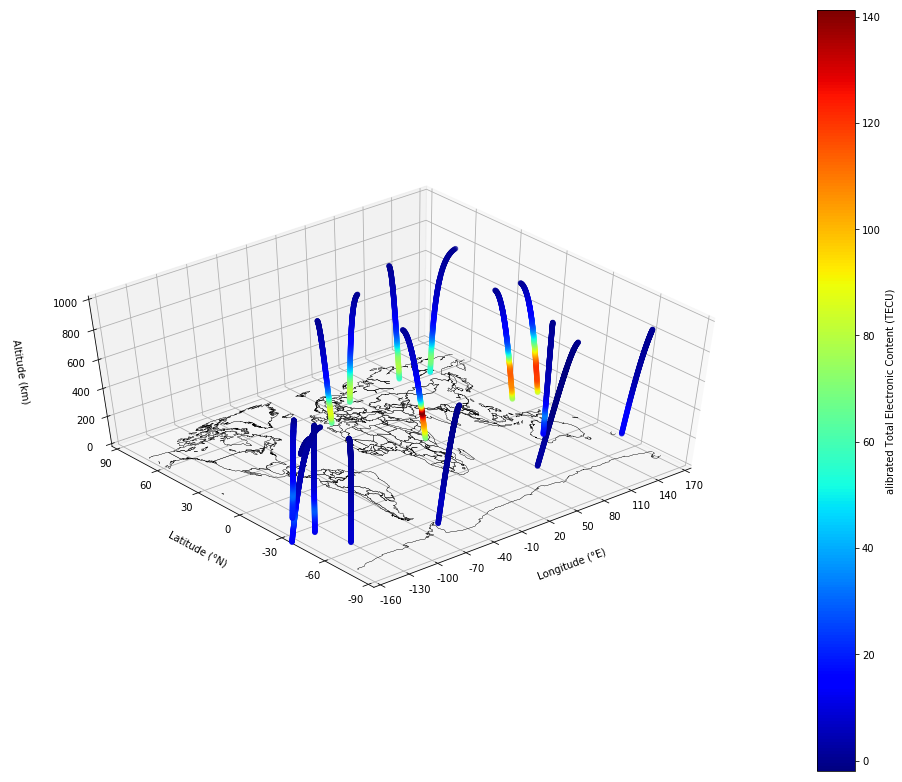

In [13]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
from netCDF4 import Dataset

# Create a 3d normal figure
fig = plt.figure(figsize=(17, 14))
ax = fig.gca(projection='3d')


# Define lower left, uperright lontitude and lattitude respectively
extent = [-160, 170, -90, 90]
# Create a basemap instance that draws the Earth layer
bm = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[2],
             urcrnrlon=extent[1], urcrnrlat=extent[3])



# Add Basemap to the figure
ax.add_collection3d(bm.drawcoastlines(linewidth=0.25))
ax.add_collection3d(bm.drawcountries(linewidth=0.35))
ax.view_init(azim=230, elev=50)
ax.set_xlabel('Longitude (°E)', labelpad=20)
ax.set_ylabel('Latitude (°N)', labelpad=20)
ax.set_zlabel('Altitude (km)', labelpad=20)


# Add meridian and parallel gridlines
lon_step = 30
lat_step = 30
meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
ax.set_yticks(parallels)
ax.set_yticklabels(parallels)
ax.set_xticks(meridians)
ax.set_xticklabels(meridians)
ax.set_zlim(0., 1000.)


# Import data to illustrate
# empty array for place holder
lons = np.array([]) # longtitude
lats = np.array([]) # latitude
msl_alt = np.array([]) # altitude (en nuestro caso es el TIEMPO)
elec_dens = np.array([]) # electron density 
tec_cal = np.array([]) # calibrated total electron content

directory = os.fsencode('.')

# Import data to illustrate
for i, file in enumerate(os.listdir(directory)):
    filename = os.fsdecode(file)
    if (filename.startswith("ionPrf") and i < 20):
        # print(os.path.join(directory, filename))
        ###
        fh = Dataset(filename, mode='r')
        lons = np.concatenate([lons, fh.variables['GEO_lon'][:]])
        lats = np.concatenate([lats, fh.variables['GEO_lat'][:]])
        elec_dens = np.concatenate([elec_dens, fh.variables['ELEC_dens'][:]])
        elec_dens_unit = fh.variables['ELEC_dens'].units
        tec_cal = np.concatenate([tec_cal, fh.variables['TEC_cal']])
        tec_unit = fh.variables['TEC_cal'].units
        msl_alt = np.concatenate([msl_alt, fh.variables['MSL_alt'][:]])
        fh.close()

print('Lons: ',lons)
print('lat: ',lats)
print('Altitud: ',msl_alt)
print('Densidad: ',elec_dens)
print('Total Electronic Content: ',tec_cal)

# Uncomment to plot Total Electron Content or Electron density
#p = ax.scatter(lons, lats, msl_alt, c=elec_dens, cmap='jet')
#fig.colorbar(p, label='Electron density (el/cm3)')
# scatter map based on lons, lats, alts and color based on the total electron content.
p = ax.scatter(lons, lats, msl_alt, c=tec_cal, cmap='jet')
# Add a colorbar to reference the intensity
fig.colorbar(p, label='alibrated Total Electronic Content (TECU)')

plt.show()